<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning 
* Understanding Data Visualization

### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [43]:
## Importing various libraries.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

## Read the csv file
df = pd.read_csv('Data CSV.csv')

In [44]:
## Display the first 5 rows
print(df.head(5))


        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

In [45]:
## Display the data types
print(df.dtypes)


id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset. 
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [46]:
# Drop unwanted columns
df["country"].value_counts()

United States    102067
Name: country, dtype: int64

In [47]:
## Create list of columns to drop
columns_to_drop  = ['host id', 'id' , 'country','country code']


## Drop columns from dataframe and save in new dataframe
airbnb_dropped = df.drop(columns_to_drop, axis=1)

airbnb_dropped.head(5)

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [48]:
## Check for missing values in the dataframe and display the count in ascending order.
missing_values = df.isnull().sum().sort_values(ascending=True)
print(missing_values)

##If values are missing, impute the values according to the data type of the columns.
for column in df.columns:
      if df[column].dtype == 'object':
          df[column] = df[column].fillna('Unknown') # Replace missing values of object columns with Unknown
      elif df[column].dtype == 'float64':
          df[column] = df[column].fillna(df[column].mean()) # Replace missing values with float column mean
      elif df[column].dtype == 'int64':
          df[column] = df[column].fillna(df[column].median()) # Replace missing values with the median of integer columns

df.head(30)

id                                     0
room type                              0
host id                                0
long                                   8
lat                                    8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
country code                         131
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
country                              532
reviews per month                  15879
last review                        15893
house_rules     

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.210000,4.000000,6.0,286.0,Clean up and treat the home the way you'd like...,Unknown
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.380000,4.000000,2.0,228.0,Pet friendly but please confirm with me if the...,Unknown
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,Unknown,1.374022,5.000000,1.0,352.0,"I encourage you to use my kitchen, cooking and...",Unknown
3,1002755,Unknown,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.640000,4.000000,1.0,322.0,Unknown,Unknown
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.100000,3.000000,1.0,289.0,"Please no smoking in the house, porch or on th...",Unknown
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.590000,3.000000,1.0,374.0,"No smoking, please, and no drugs.",Unknown
6,1004650,BlissArtsSpace!,61300605564,Unknown,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.400000,5.000000,1.0,224.0,Please no shoes in the house so bring slippers...,Unknown
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.400000,5.000000,1.0,219.0,House Guidelines for our BnB We are delighted ...,Unknown
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.470000,3.000000,1.0,180.0,- Please clean up after yourself when using th...,Unknown
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/2017,0.990000,5.000000,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,Unknown


In [60]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
df = df.drop_duplicates()



In [50]:
## Display the total number of records in the dataframe after removing the duplicates.
print("Total number of records after removing duplicates:", len(df))



Total number of records after removing duplicates: 102058


## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [51]:
## Rename the column availability 365 to days_booked
df = df.rename(columns={'availability 365': 'days_booked'})
# Display the updated dataframe
df.head()



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,days_booked,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.210000,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,Unknown
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.380000,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,Unknown
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,Unknown,1.374022,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",Unknown
3,1002755,Unknown,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.640000,4.0,1.0,322.0,Unknown,Unknown
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.100000,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",Unknown


In [61]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [53]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.

# Replace dollar sign, comma and Unknown with NaN in price column
df['price'] = df['price'].replace({'\$': '', ',': '', 'Unknown': np.nan}, regex=True).astype(float)

# Replace dollar sign, comma and Unknown with NaN in Service_fee column
df['service_fee'] = df['service_fee'].replace({'\$': '', ',': '', 'Unknown': np.nan}, regex=True).astype(float)

# Display the updated data frame
print(df.head())

        id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                           Unknown  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                Unknown     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service_fee minimum_nights  \
0  40.64749 -73.97237  United St

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [54]:
## List the count of various room types avaliable with Airbnb
room_type_counts = df['room_type'].value_counts()
print(room_type_counts)


Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: room_type, dtype: int64


In [55]:
## Which room type adheres to more strict cancellation policy
room_type_cancellation = df.groupby('room_type')['cancellation_policy'].value_counts()
most_strict_cancellation = room_type_cancellation.groupby('room_type').idxmax().apply(lambda x: x[1])
print(most_strict_cancellation)

room_type
Entire home/apt    flexible
Hotel room         flexible
Private room       moderate
Shared room          strict
Name: cancellation_policy, dtype: object


In [57]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
average_price_neighborhood = df.groupby('neighbourhood_group')['price'].mean()
most_expensive_neighborhood = average_price_neighborhood.idxmax()
print(average_price_neighborhood)
print("Most expensive neighbourhood:",most_expensive_neighborhood)



neighbourhood_group
Bronx            627.764793
Brooklyn         626.501962
Manhattan        622.650931
Queens           630.217031
Staten Island    623.990486
Unknown          658.357143
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64
Most expensive neighbourhood: Unknown


## Task 5a: Data Visualization (Any Tool)

- Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset.
    - Create another chart with the 10 cheapest neighborhoods in the dataset.
- Create a box and whisker chart that showcases the price distribution of all listings split by room type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

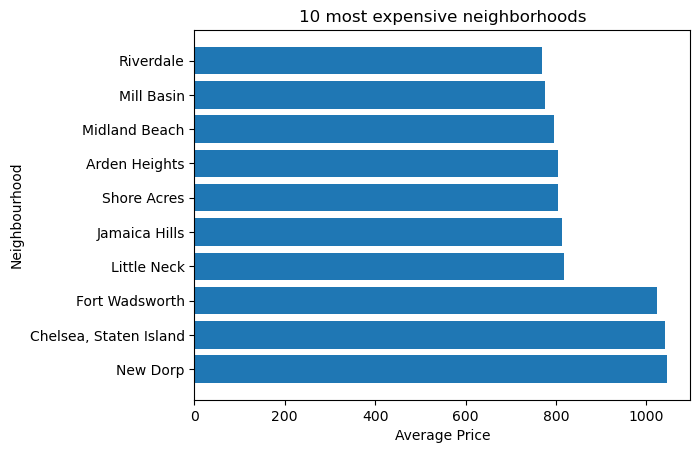

In [58]:
# Top 10 most expensive neighborhoods
top_10_expensive_neighborhoods = df.groupby('neighbourhood')['price'].mean().nlargest(10)

# Create a horizontal bar chart
plt.barh(top_10_expensive_neighborhoods.index, top_10_expensive_neighborhoods.values)
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.title('10 most expensive neighborhoods')
plt.show()

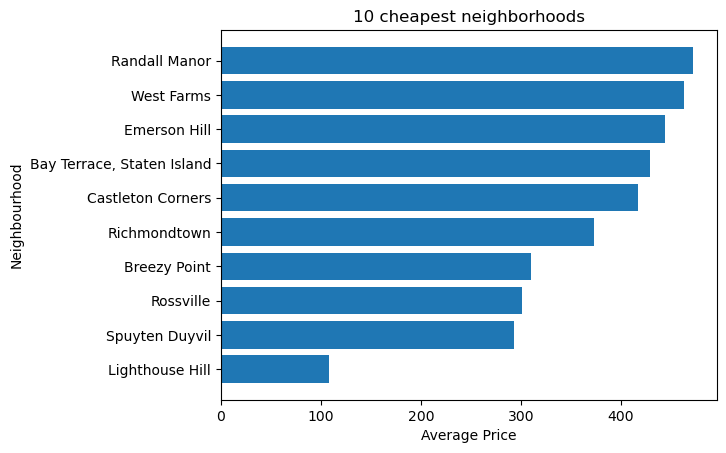

In [313]:
# Top 10 cheapest neighborhoods
top_10_cheapest_neighborhoods = df.groupby('neighbourhood')['price'].mean().nsmallest(10)

# Create a horizontal bar chart
plt.barh(top_10_cheapest_neighborhoods.index, top_10_cheapest_neighborhoods.values)
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.title('10 cheapest neighborhoods')
plt.show()


<Figure size 1000x600 with 0 Axes>

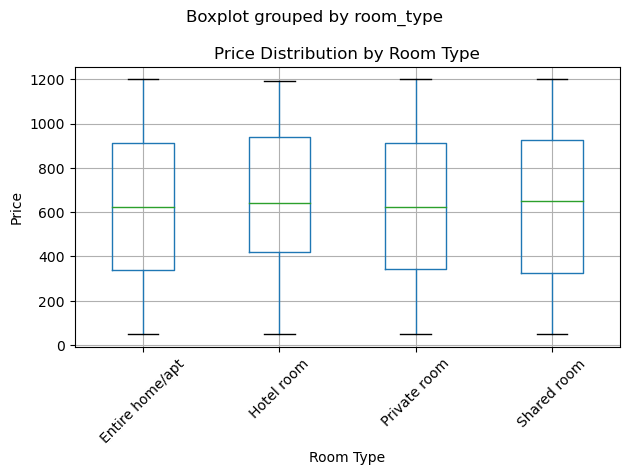

In [314]:
## Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create the box and whisker chart
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='room_type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Task 5b: Data Visualization (Any Tool)

- Create a scatter plot to illustrate the relationshi between the cleaning fee and the room price and write down the kind of correlation, if any, that you see.
- Create a line chart to showcase the total amount of listings available per year.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

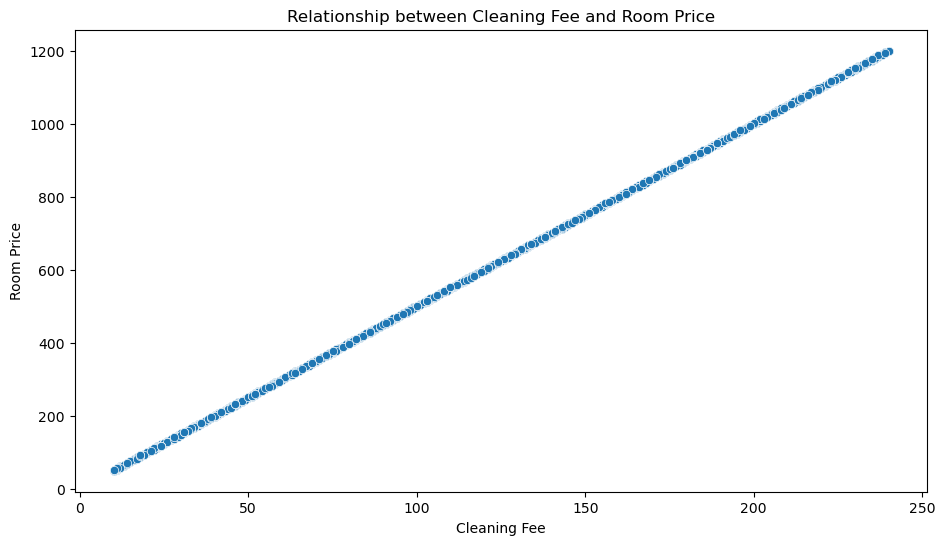

In [59]:
# Create a scatter plot to illustrate the relationship between the cleaning fee and the room price
plt.figure(figsize=(11, 6))
sns.scatterplot(data=df, x='service_fee', y='price')
plt.xlabel('Cleaning Fee')
plt.ylabel('Room Price')
plt.title('Relationship between Cleaning Fee and Room Price')
plt.show()

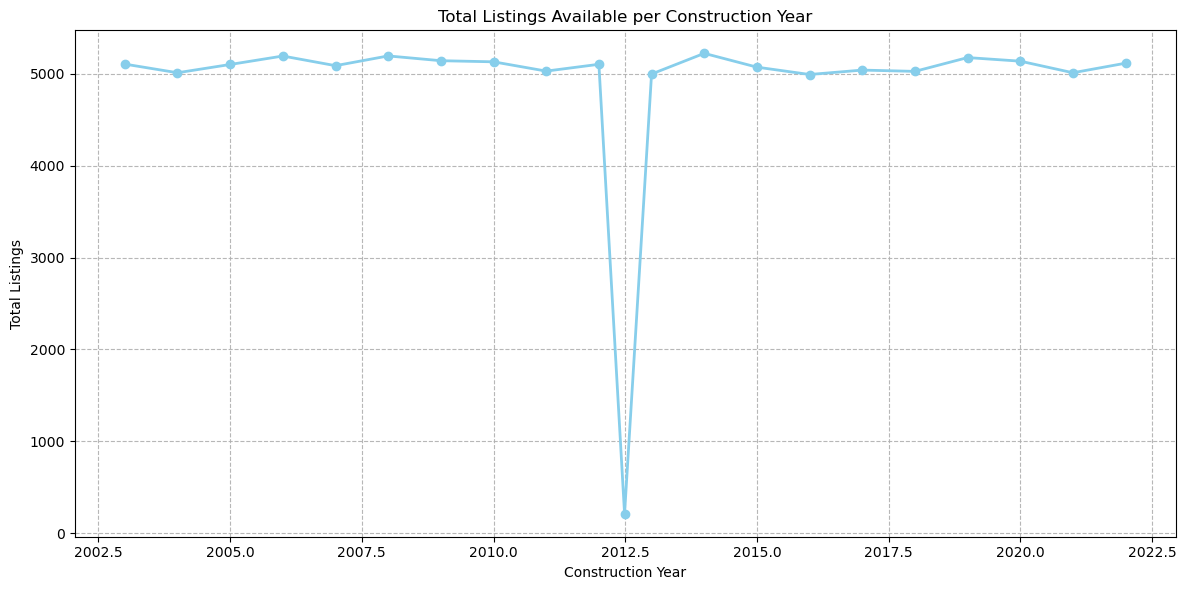

In [349]:
# Group the data by construction_year and calculate the total count of listings for each year
listings_per_year = df.groupby('construction_year').size()
##Create a line chart to showcase the total amount of listings available per year
plt.figure(figsize=(12, 6))
listings_per_year.plot(kind='line', marker='o', color='skyblue',
linewidth=2)
plt.xlabel('Construction Year')
plt.ylabel('Total Listings')
plt.title('Total Listings Available per Construction Year')
plt.grid(True, linestyle='--', alpha=0.9)
plt.tight_layout()
# Display the plot
plt.show()

## Task 5c: Data Visualization (Any Tool)

- Create a data visualization of your choosing using one of the review columns in isolation or in combination with another column.
- Create a visualization to compare at least two different variables between super hosts and regular hosts.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

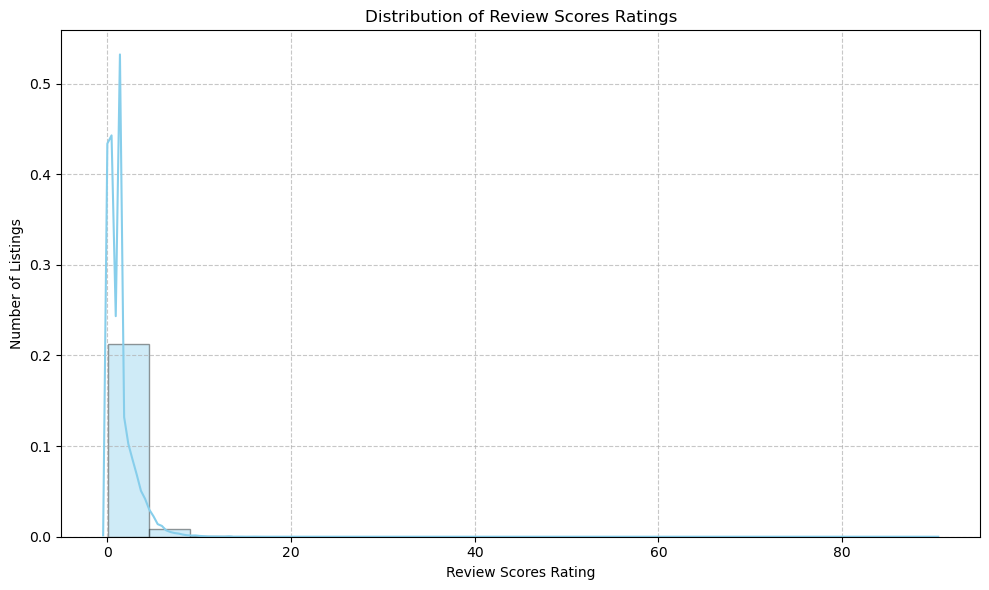

In [371]:
# Convert 'review_per_month' column to numeric
df['review_scores_rating'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')

# Create a histogram using sns.distplot()
plt.figure(figsize=(10, 6))
sns.distplot(df['review_scores_rating'], bins=20, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'})
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Listings')
plt.title('Distribution of Review Scores Ratings')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


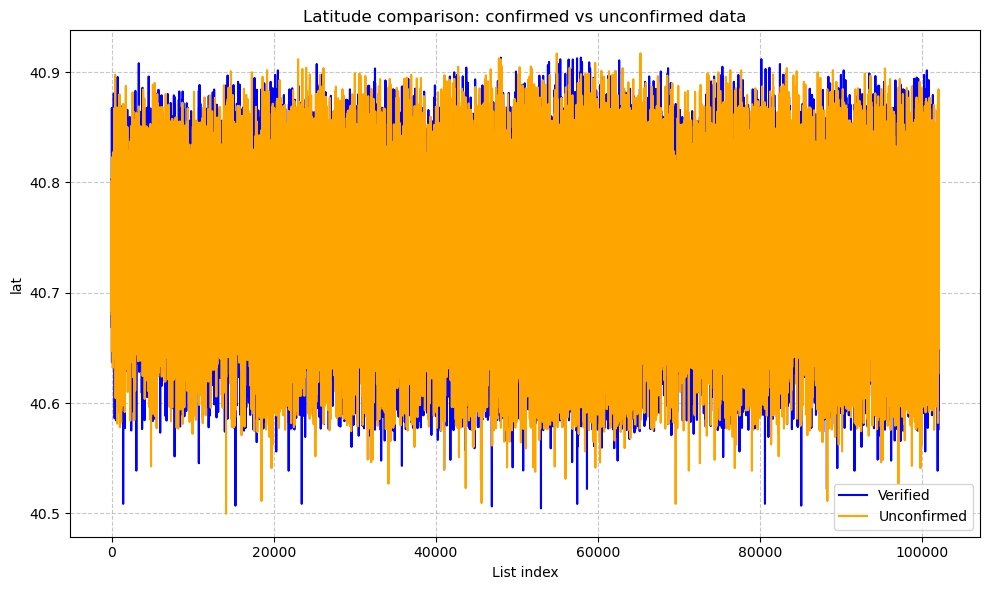

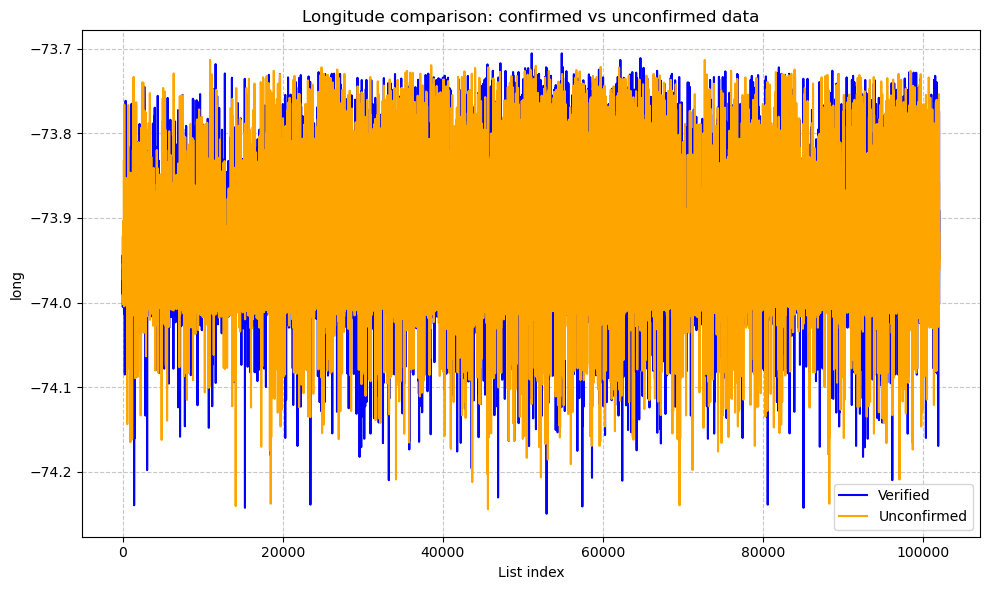

In [379]:
# Filter data for "confirmed" listings
verified_listings = df[df['host_identity_verified'] == 'verified']

# Filter data from "unconfirmed" listings
unconfirmed_listings = df[df['host_identity_verified'] == 'unconfirmed']

# Create a line graph to compare "verified" and "unverified" listings
plt.figure(figsize=(10, 6))
plt.plot(verified_listings['lat'], label='Verified', color='blue')
plt.plot(unconfirmed_listings['lat'], label='Unconfirmed', color='orange')
plt.xlabel('List index')
plt.ylabel('lat')
plt.title('Latitude comparison: confirmed vs unconfirmed data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create another line graph to compare the longitudes of "verified" and "unverified" listings
plt.figure(figsize=(10, 6))
plt.plot(verified_listings['long'], label='Verified', color='blue')
plt.plot(unconfirmed_listings['long'], label='Unconfirmed', color='orange')
plt.xlabel('List index')
plt.ylabel('long')
plt.title('Longitude comparison: confirmed vs unconfirmed data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()